In [31]:
import numpy as np
import tables
import os

np.set_printoptions(threshold=np.nan)

In [32]:
os.listdir()

['.ipynb_checkpoints',
 'correlation.ipynb',
 'motion_vectors_brocks.hdf5',
 'motion_vectors_brocks2.hdf5',
 'motion_vectors_farneback.hdf5',
 'motion_vectors_farneback2.hdf5',
 'motion_vectors_h264.h5',
 'motion_vectors_h264_median.hdf',
 'None0000000.png',
 'qualitative_comparison.ipynb',
 'RPS_05_PS_C2.wmv',
 'x_subsample',
 'y_subsample']

In [33]:
brocks_path = os.getcwd()+ "/" +"motion_vectors_brocks2.hdf5"
farneback_path = os.getcwd()+ "/" +"motion_vectors_farneback2.hdf5"
#h264_path = os.getcwd()+ "/" +"motion_vectors_h264.h5"

h264_path = os.getcwd()+ "/" +"motion_vectors_h264_median.hdf"



brocks = tables.open_file(brocks_path, mode='r')
farneback = tables.open_file(farneback_path, mode='r')
h264 = tables.open_file(h264_path, mode='r')

In [34]:
brocks = brocks.root.motion_tensor

In [35]:
farneback = farneback.root.motion_tensor

In [36]:
h264 = h264.root.motion_tensor

In [37]:
#h264 = np.asarray(h264, dtype = np.int32)

In [38]:
n = np.min([h264.shape[0],farneback.shape[0],brocks.shape[0]])
ny = h264.shape[1]
nx = h264.shape[2]

In [39]:
n

30017

In [40]:
def get_sample(component="x", non_zero_only = False):
    """ Subsamples vector components  from the results of (1) the H264 readout, (2) the Farneback results and 
        (3) the results of Brocks algorithm
        args: 
            component: Either "x" or "y". Denotes the vector component.
            non_zero_only (optional): False by default. If true vectors are resampled until one is found where
                                      the H.264 readout (in the respective component) is non-zero
    """
    while(True):
        frame = np.random.randint(0,n)
        if(np.sum(h264[frame])==0):#Skip empty frames
            continue
        else:
            x = np.random.randint(0,nx)
            y = np.random.randint(0,ny)
                    
            if(component=="x"):
                if(non_zero_only):#resample
                    while(True):
                        if(h264[frame,y,x,0]==0):
                            frame = np.random.randint(0,n)
                            x = np.random.randint(0,nx)
                            y = np.random.randint(0,ny)
                        else:
                            break
                return [h264[frame,y,x,0],farneback[frame,y,x,0],brocks[frame,y,x,0]]
            if(component=="y"):
                if(non_zero_only):#resample
                    while(True):
                        if(h264[frame,y,x,1]==0):
                            frame = np.random.randint(0,n)
                            x = np.random.randint(0,nx)
                            y = np.random.randint(0,ny)
                        else:
                            break
                return [h264[frame,y,x,1],farneback[frame,y,x,1],brocks[frame,y,x,1]]

# Y-Component

In [41]:
from scipy import stats

In [42]:
import pickle

In [43]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [44]:
sample_set_y = []
n_found = 0
for x in range(10000):
    n_found += 1
    print(n_found)
    sample_set_y.append(get_sample("y", non_zero_only = True))
    clear_output()
    
sample_set_y = np.array(sample_set_y)
#sample_set_y[:,0] = sample_set_y[:,0]/16.0 #Scale down

In [45]:
y_subsample = "y_subsample"

In [46]:
file = open(y_subsample, "wb")
#pickle.dump(sample_set_y,file)
file.close()

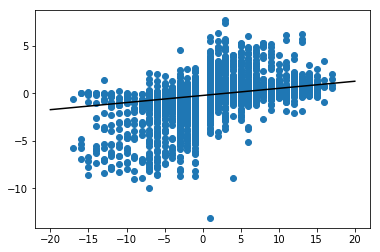

In [48]:
plt.scatter(sample_set_y[:,0],sample_set_y[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,1])
plt.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

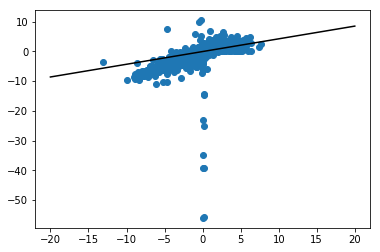

In [49]:
plt.scatter(sample_set_y[:,1],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,1],sample_set_y[:,2])
plt.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

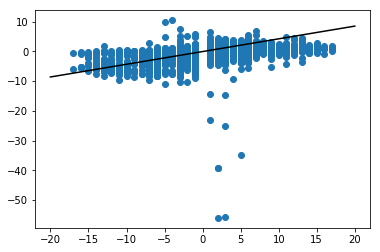

In [50]:
plt.scatter(sample_set_y[:,0],sample_set_y[:,2])
#plt.ylim(-15, 15)
#plt.xlim(-15, 15)

slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,1],sample_set_y[:,2])
plt.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

In [51]:
np.corrcoef(sample_set_y[:,0], sample_set_y[:,1])

array([[1.        , 0.45380727],
       [0.45380727, 1.        ]])

In [52]:
np.corrcoef(sample_set_y[:,1], sample_set_y[:,2])

array([[1.        , 0.62339503],
       [0.62339503, 1.        ]])

In [53]:
np.corrcoef(sample_set_y[:,0], sample_set_y[:,2])

array([[1.        , 0.30181973],
       [0.30181973, 1.        ]])

# X Component

In [54]:
sample_set_x = []
n_found = 0
for x in range(10000):
    n_found += 1
    print(n_found)
    sample_set_x.append(get_sample("x", non_zero_only = True))
    clear_output()
    
sample_set_x = np.array(sample_set_x)
#sample_set_x[:,0] = sample_set_x[:,0]/16.0 #Scale down

In [55]:
x_subsample = "x_subsample"

In [56]:
file = open(x_subsample, "wb")
#pickle.dump(sample_set_x,file)
file.close()

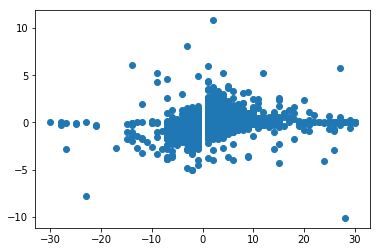

In [58]:
plt.scatter(sample_set_x[:,0],sample_set_x[:,1])


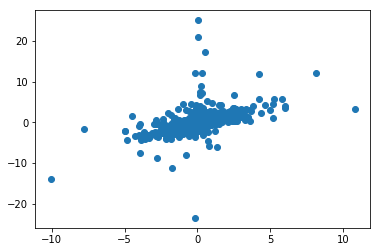

In [59]:
plt.scatter(sample_set_x[:,1],sample_set_x[:,2])

#plt.xlim(-2.5, 2.5)
#plt.ylim(-2.5, 2.5)

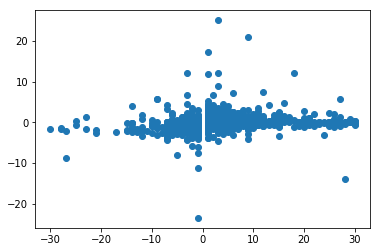

In [60]:
plt.scatter(sample_set_x[:,0],sample_set_x[:,2])
#plt.xlim(-2.5, 2.5)
#plt.ylim(-2.5, 2.5)

In [61]:
np.corrcoef(list(sample_set_x[:,0]), sample_set_x[:,1])

array([[1.        , 0.25253523],
       [0.25253523, 1.        ]])

In [62]:
np.corrcoef(sample_set_x[:,1], sample_set_x[:,2])

array([[1.        , 0.61420483],
       [0.61420483, 1.        ]])

In [63]:
np.corrcoef(sample_set_x[:,0], sample_set_x[:,2])

array([[1.        , 0.22705831],
       [0.22705831, 1.        ]])

# Combined Scatterplot of subsample

In [47]:
file = open(y_subsample, "rb")
sample_set_y = pickle.load(file)
file.close()

In [57]:
file = open(x_subsample, "rb")
sample_set_x = pickle.load(file)
file.close()

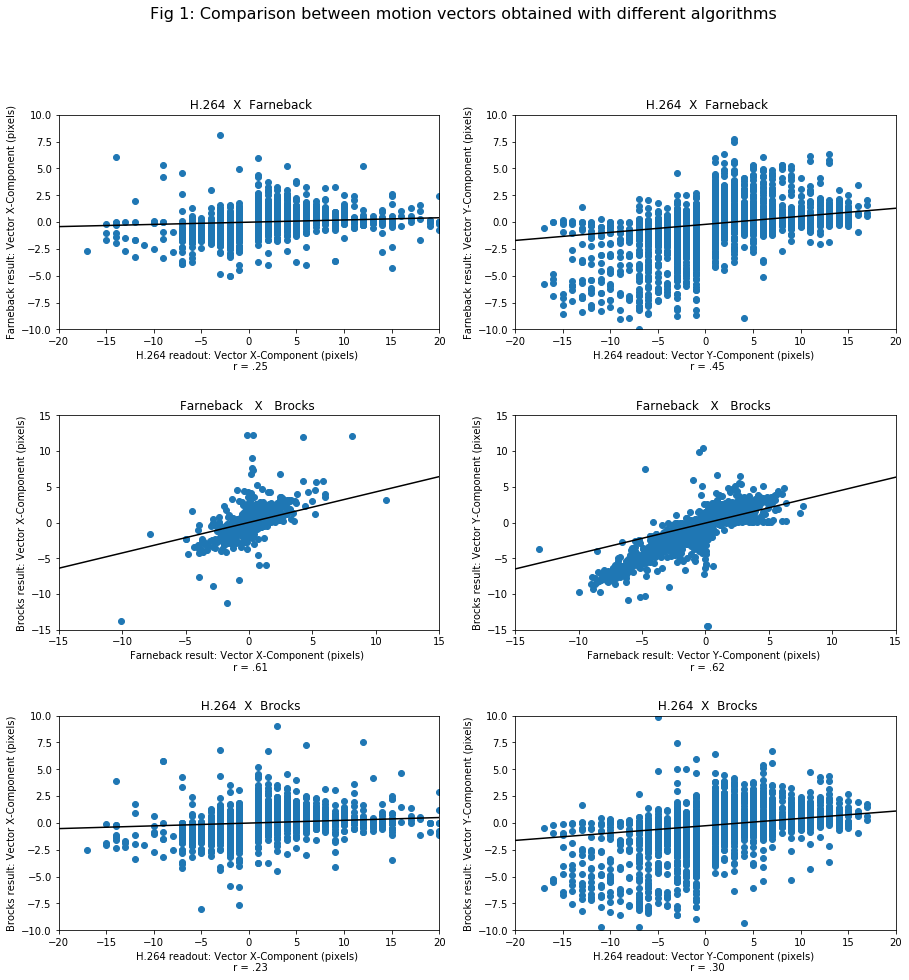

In [84]:
fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)

ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

fig.subplots_adjust(hspace = .4)
fig.suptitle("Fig 1: Comparison between motion vectors obtained with different algorithms", fontsize= 16)


###### Farneback x H.264 (y)
ax2.scatter(sample_set_y[:,0],sample_set_y[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,1])
ax2.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax2.set_title(" H.264  X  Farneback")
ax2.set_ylabel("Farneback result: Vector Y-Component (pixels)")
ax2.set_xlabel("H.264 readout: Vector Y-Component (pixels) \n r = .45")


##### Farneback x Brocks (y)

ax4.scatter(sample_set_y[:,1],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,1],sample_set_y[:,2])
ax4.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax4.set_title("Farneback   X   Brocks ")
ax4.set_xlabel("Farneback result: Vector Y-Component (pixels) \n r = .62")
ax4.set_ylabel("Brocks result: Vector Y-Component (pixels)")


#### H.264 x Brocks (y)
ax6.scatter(sample_set_y[:,0],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,2])
ax6.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax6.set_title(" H.264  X  Brocks")
ax6.set_ylabel("Brocks result: Vector Y-Component (pixels)")
ax6.set_xlabel("H.264 readout: Vector Y-Component (pixels) \n r = .30")

###### Farneback x H.264 (x)
ax1.scatter(sample_set_x[:,0],sample_set_x[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,0],sample_set_x[:,1])
ax1.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax1.set_title(" H.264  X  Farneback")
ax1.set_ylabel("Farneback result: Vector X-Component (pixels)")
ax1.set_xlabel("H.264 readout: Vector X-Component (pixels) \n r = .25")


##### Farneback x Brocks (x)

ax3.scatter(sample_set_x[:,1],sample_set_x[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,1],sample_set_x[:,2])
ax3.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax3.set_title("Farneback   X   Brocks ")
ax3.set_xlabel("Farneback result: Vector X-Component (pixels) \n r = .61")
ax3.set_ylabel("Brocks result: Vector X-Component (pixels)")

#### H.264 x Brocks (x)
ax5.scatter(sample_set_x[:,0],sample_set_x[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,0],sample_set_x[:,2])
ax5.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax5.set_title(" H.264  X  Brocks")
ax5.set_ylabel("Brocks result: Vector X-Component (pixels)")
ax5.set_xlabel("H.264 readout: Vector X-Component (pixels) \n r = .23")



if(True):
    ax1.set_ylim(-10, 10)
    ax1.set_xlim(-20, 20)
    
    ax2.set_ylim(-10, 10)
    ax2.set_xlim(-20, 20)
    
    ax3.set_ylim(-15, 15)
    ax3.set_xlim(-15, 15)
    
    ax4.set_ylim(-15, 15)
    ax4.set_xlim(-15, 15)

    ax5.set_ylim(-10, 10)
    ax5.set_xlim(-20, 20)
    
    ax6.set_ylim(-10, 10)
    ax6.set_xlim(-20, 20)

# Colormap approach for whole video

In [71]:
minimum = -25
maximum = 25
h264_x_farneback_x = np.histogram2d(h264[:n,:,:,0].flatten(), 
                     farneback[:n,:,:,0].flatten(), 
                     [100,100], range = [[minimum,maximum],[minimum,maximum]])

In [72]:
minimum = -25
maximum = 25
h264_x_farneback_y = np.histogram2d(h264[:n,:,:,1].flatten(), 
                     farneback[:n,:,:,1].flatten(), 
                     [100,100], range = [[minimum,maximum],[minimum,maximum]])

In [ ]:
minimum = -25
maximum = 25
h264_x_farneback_x = np.histogram2d(farneback[:n,:,:,0].flatten(), 
                     brocks[:n,:,:,0].flatten(), 
                     [100,100], range = [[minimum,maximum],[minimum,maximum]])

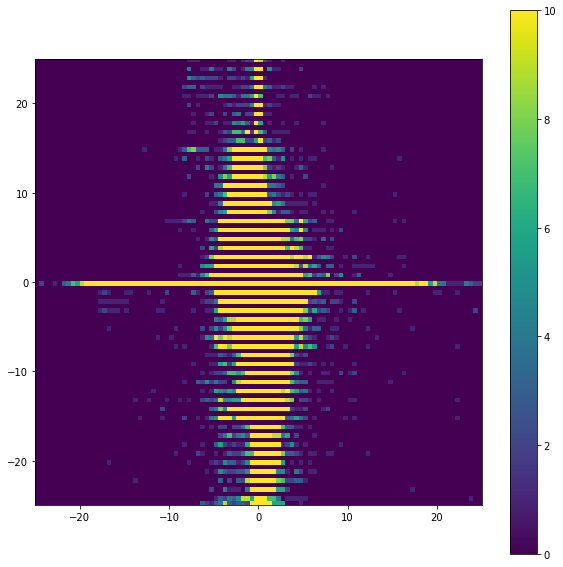

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(h264_x_farneback_x[0], extent=[minimum, maximum, minimum, maximum],vmin = 0, vmax = 10)
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(h264_x_farneback_y[0], extent=[minimum, maximum, minimum, maximum],vmin = 0, vmax = 10)
plt.colorbar()

In [ ]:
np.corrcoef(h264[:n,:,:,0].flatten(), farneback[:n,:,:,0].flatten())

In [ ]:
np.corrcoef(h264[:n,:,:,1].flatten(), farneback[:n,:,:,1].flatten())